# Analysis

In [23]:
from file import read, write
import pandas as pd

In [24]:
TEAMS = {}

for team in read('data/teams.json'):
    teamID = team["team_id"]
    TEAMS[teamID] = team

In [25]:
games = read('data/games.json')

gamesToRemove = []
for i in range(len(games)):
    game = games[i]

    if 'start_time' not in game:
        gamesToRemove.append(i)

    remove = []
    for key, value in game.items():
        if type(value) == type("string"):
            remove.append(key)
    
    for key in remove:
        del game[key]

for index in sorted(gamesToRemove, reverse=True):
    del games[index]

In [26]:
df = pd.DataFrame(games)

# clean
df = df.dropna(axis='columns')

# normalize
for column in df.columns:
    df[column] = (df[column] - df[column].mean()) / df[column].std()     
    
df

,blue_adc_assists,blue_adc_damage_to_objectives,blue_adc_deaths,blue_adc_kills,blue_adc_minion_kills,blue_adc_vision_score,blue_deaths,blue_gold,blue_jungle_assists,blue_jungle_damage_to_objectives,...,red_support_vision_score,red_support_xp,red_top_assists,red_top_damage_to_objectives,red_top_deaths,red_top_kills,red_top_minion_kills,red_top_vision_score,red_top_xp,total
0,-1.431130,-1.191517,0.900031,-0.641908,-1.069656,-1.447294,1.101539,-1.341098,-0.850124,-1.816618,...,-0.579971,0.121126,1.316882,-0.664632,-1.437512,-0.298728,-1.159090,-0.600313,-0.734041,0.507415
1,-0.020458,1.221029,-0.240573,-0.006977,0.292817,-0.548710,-0.016657,-0.132915,0.536760,1.218470,...,-0.243518,-0.678514,-0.336439,-1.215363,1.168810,0.578093,-0.871951,-0.440317,-0.717917,0.507415
2,-1.148996,-0.605286,-0.240573,-0.324442,-0.682589,-1.559617,1.381088,-1.553444,-0.156682,-1.210626,...,-1.185587,-0.575388,0.765775,-0.021516,-1.437512,1.016504,-0.256654,-0.760309,-0.455842,0.507415
3,-0.866861,-0.926612,0.329729,-0.324442,-1.766374,-1.896585,0.821990,-1.856857,-0.156682,-0.586436,...,-0.950070,-0.748902,-0.060885,-0.274672,-0.394983,1.454915,-0.666852,-1.320296,-0.746646,0.507415
4,-1.148996,-1.233910,0.329729,-0.324442,-1.054173,-1.615778,1.101539,-1.302119,-0.387829,-1.574072,...,-1.051006,-0.312660,1.592435,-0.479130,-0.394983,1.454915,-0.707872,-1.480293,-0.447047,0.507415
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23701,1.108079,0.761157,0.329729,0.310488,-1.781857,-0.885679,-0.855304,-0.874563,-0.618976,0.006851,...,-1.454750,-1.623841,-1.438653,-0.278679,-0.394983,0.139683,-0.974501,-1.480293,-1.521147,1.762375
23702,-0.584727,-0.775701,2.040635,-0.959373,-0.620659,-0.492549,1.800412,-1.145768,0.074465,-1.155516,...,-1.084651,-0.132189,1.041328,0.349806,-1.437512,2.331736,-1.056540,-0.040326,-0.347963,1.762375
23703,2.518750,0.182658,2.610937,1.897814,0.943088,1.248457,2.079961,1.231879,0.767907,0.010682,...,0.059290,1.486734,4.072417,0.609846,1.690074,1.893325,-0.830931,2.039625,0.600083,1.762375
23704,0.261676,-1.025200,2.610937,-0.959373,-0.620659,-0.548710,2.359510,-0.335538,-0.156682,-0.158919,...,-0.075291,0.409635,0.214668,0.117420,1.168810,2.770147,-0.625832,0.759655,0.137493,1.762375


In [27]:
import numpy as np
from sklearn.decomposition import PCA

In [28]:
pca = PCA(n_components=5, whiten=False)
pca.fit(df)

print(pca.explained_variance_ratio_)
print(pca.singular_values_)

[0.22623843 0.20023497 0.0907221  0.03540099 0.02463101]
[634.21104962 596.65127362 401.61244311 250.87554269 209.26265665]


78.8096


<Axes: title={'center': 'Total Games'}, xlabel='Teams Ranked by Number of Games', ylabel='Num of Games'>

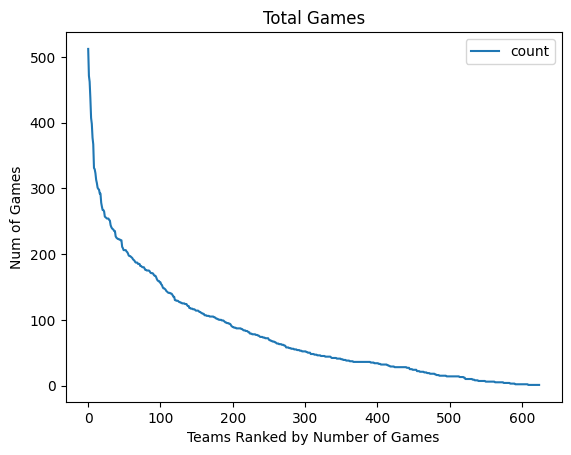

In [37]:
gameCounts = {}
for game in read('data/games.json'):
    red = game['red_id'] if 'red_id' in game else ''
    blue = game['blue_id'] if 'blue_id' in game else ''

    if red:
        if red in gameCounts:
            gameCounts[red] += 1 
        else: gameCounts[red] = 1
    if blue:
        if blue in gameCounts:
            gameCounts[blue] += 1
        else: gameCounts[blue] = 1

counts = []
for team, count in gameCounts.items():
    counts.append({'team_id': team, 'count': count})

counts.sort(key=lambda x: x['count'], reverse=True)

df = pd.DataFrame(counts)
print(df['count'].mean())

df.plot(title="Total Games", xlabel="Teams Ranked by Number of Games", ylabel="Num of Games")

## Total Games by Region

<Axes: title={'center': 'Total Games'}, xlabel='Regions Ranked by Number of Games', ylabel='Num of Games'>

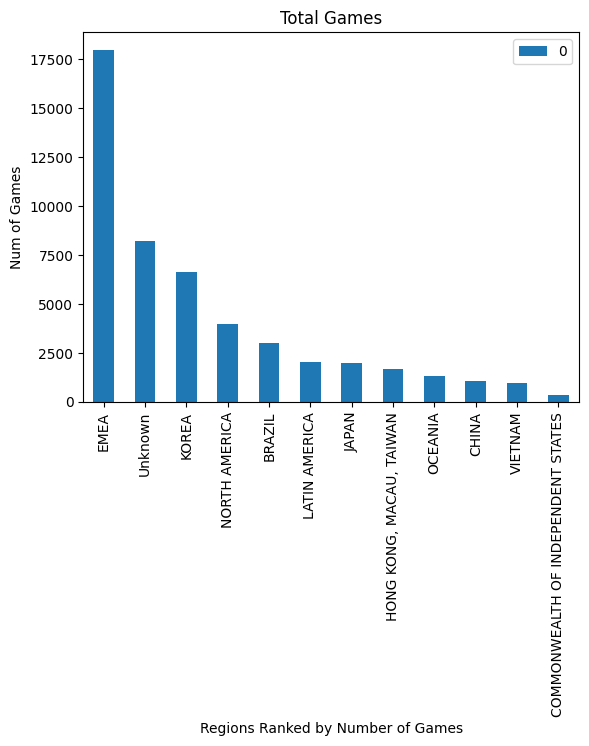

In [54]:
regions = read('data/regions.json')

gameCounts = {}
for game in read('data/games.json'):
    red = game['red_id'] if 'red_id' in game else ''
    blue = game['blue_id'] if 'blue_id' in game else ''

    redRegion = regions[red] if red in regions else 'UNKNOWN'
    blueRegion = regions[blue] if blue in regions else 'UNKNOWN'

    if redRegion in gameCounts:
        gameCounts[redRegion] += 1 
    else: gameCounts[redRegion] = 1
    if blueRegion in gameCounts:
        gameCounts[blueRegion] += 1
    else: gameCounts[blueRegion] = 1

array = []
for region, count in gameCounts.items():
    array.append({'region': region, 'count': count})
array.sort(key=lambda x: x['count'], reverse=True)
# print('array: ', array)

regions = []
counts = []

for c in array :
    regions.append(c['region'])
    counts.append(c['count'])

df = pd.DataFrame(counts, index=regions)
df.plot(kind='bar', title="Total Games", xlabel="Regions Ranked by Number of Games", ylabel="Num of Games")

In [38]:
from pyvis.network import Network
import random

def randomColor():
    return "%06x" % random.randint(0, 0xFFFFFF)

teams = read('data/teams.json')
regions = read('data/regions.json')

groups = {}
count = 1

net = Network(notebook=True, cdn_resources='in_line')
for team in teams:
    region = regions[team['team_id']] if team['team_id'] in regions else 'UNKNOWN'

    if region in groups:
        group = groups[region] 
    else:
        groups[region] = count
        group = count
        count += 1

    net.add_node(team['team_id'], label=team['name'], group=group)

print("num of groups: ", len(groups))

games = read('data/games.json')
for game in games:
    red = game['red_id']
    blue = game['blue_id']

    if red in TEAMS and blue in TEAMS:
        net.add_edge(red, blue, value=1)

net.show("network.html")

num of groups:  13
network.html


In [32]:
games = read('data/games.json')
    
games.sort(key=lambda x: x["start_time"] if 'start_time' in x else x['tournament_startDate'])
dates = pd.to_datetime([d['start_time'] if 'start_time' in d else d['tournament_startDate'] for d in games], format='ISO8601')

df = pd.DataFrame({
    'elo': [1 for d in games],
}, index=dates)

df.plot(title="Elo: " + TEAMS[id]["name"], xlabel="Timestamp", figsize=(20, 5))


/var/folders/zr/gbjgfrkj2vl79l581htfjm540000gn/T/ipykernel_45134/2239450792.py:4: FutureWarning: In a future version of pandas, parsing datetimes with mixed time zones will raise a warning unless `utc=True`. Please specify `utc=True` to opt in to the new behaviour and silence this warning. To create a `Series` with mixed offsets and `object` dtype, please use `apply` and `datetime.datetime.strptime`
  dates = pd.to_datetime([d['start_time'] if 'start_time' in d else d['tournament_startDate'] for d in games], format='ISO8601')


KeyError: <built-in function id>